In [3]:
a = {'Salary':[35000,40000,45000,50000,55000,60000,65000,70000 ],
     'Spendings':[20000,25000,100000,35000,50000,45000,30000,55000 ]}

a

{'Salary': [35000, 40000, 45000, 50000, 55000, 60000, 65000, 70000],
 'Spendings': [20000, 25000, 100000, 35000, 50000, 45000, 30000, 55000]}

In [5]:
import pandas as pd

In [7]:
df = pd.DataFrame(a)
df

,Salary,Spendings
0,35000,20000
1,40000,25000
2,45000,100000
3,50000,35000
4,55000,50000
5,60000,45000
6,65000,30000
7,70000,55000


In [9]:
import seaborn as sns

<Axes: xlabel='Salary', ylabel='Spendings'>

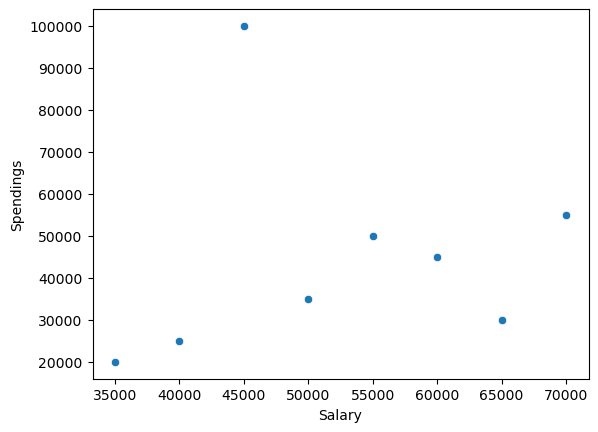

In [11]:
sns.scatterplot(data=df,x='Salary',y='Spendings')

In [13]:
df = df.drop(index=[2],axis=[0])

In [15]:
df.index=range(df.shape[0])

In [17]:
X = df[['Salary']]
Y = df[['Spendings']]

In [19]:
X
Y

,Spendings
0,20000
1,25000
2,35000
3,50000
4,45000
5,30000
6,55000


In [21]:
from sklearn.linear_model import LinearRegression

In [23]:
lr = LinearRegression()

In [25]:
model = lr.fit(X,Y)

In [27]:
YPred = model.predict(X)
YPred

array([[22608.69565217],
       [26521.73913043],
       [34347.82608696],
       [38260.86956522],
       [42173.91304348],
       [46086.95652174],
       [50000.        ]])

In [29]:
from sklearn.metrics import mean_absolute_error,r2_score

In [31]:
error = mean_absolute_error(Y,YPred)
error

5776.3975155279495

In [33]:
score = r2_score(Y,YPred)
score

0.5789160214413341

In [37]:
m = model.coef_
m

array([[0.7826087]])

In [39]:
c = model.intercept_
c

array([-4782.60869565])

In [43]:
x = int(input("ENter salary:"))
y=m*x+c+error
print("SALARY IS ",x,"for the spendings ",y)

ENter salary: 75000


SALARY IS  75000 for the spendings  [[59689.44099379]]


# Multiple Linear Regresssion = Multiple Inputs and one Output


In [51]:
b = {'CGPA':[3,3.5,4,4.5,5,5.5,6,6.5],
     'Gender':['F','M','F','M','F','M','F','M'],
     'Marks':[30,35,40,45,50,55,60,65],
     'Salary':[30000,35000,100000,45000,60000,55000,40000,65000]}

In [53]:
b

{'CGPA': [3, 3.5, 4, 4.5, 5, 5.5, 6, 6.5],
 'Gender': ['F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
 'Marks': [30, 35, 40, 45, 50, 55, 60, 65],
 'Salary': [30000, 35000, 100000, 45000, 60000, 55000, 40000, 65000]}

In [55]:
df = pd.DataFrame(b)
df

,CGPA,Gender,Marks,Salary
0,3.0,F,30,30000
1,3.5,M,35,35000
2,4.0,F,40,100000
3,4.5,M,45,45000
4,5.0,F,50,60000
5,5.5,M,55,55000
6,6.0,F,60,40000
7,6.5,M,65,65000


In [67]:
# finding average.
df.groupby(by='Gender')['Salary'].mean()

Gender
F    57500.0
M    50000.0
Name: Salary, dtype: float64

In [75]:
# co-relation.
df[['CGPA','Marks','Salary']].corr()


,CGPA,Marks,Salary
CGPA,1.000000,1.000000,0.195965
Marks,1.000000,1.000000,0.195965
Salary,0.195965,0.195965,1.000000


In [77]:
df = df.drop(index=[2],axis=[0])

In [79]:
df.index=range(df.shape[0])

In [81]:
df

,CGPA,Gender,Marks,Salary
0,3.0,F,30,30000
1,3.5,M,35,35000
2,4.5,M,45,45000
3,5.0,F,50,60000
4,5.5,M,55,55000
5,6.0,F,60,40000
6,6.5,M,65,65000


In [83]:
X = df[['CGPA','Gender','Marks']]
Y = df[['Salary']]

In [87]:
from sklearn.linear_model import LinearRegression

In [95]:
lr = LinearRegression()

# Replacing string into and numbers

In [123]:

X['Gender'] = X['Gender'].replace(['F','M'],[0,1])
X

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22496\3655075776.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].replace(['F','M'],[0,1])


,CGPA,Gender,Marks
0,3.0,0,30
1,3.5,1,35
2,4.5,1,45
3,5.0,0,50
4,5.5,1,55
5,6.0,0,60
6,6.5,1,65


In [125]:
model = lr.fit(X,Y)

In [127]:
YPred = model.predict(X)

In [129]:
YPred

array([[30689.65517241],
       [38620.68965517],
       [46206.89655172],
       [45862.06896552],
       [53793.10344828],
       [53448.27586207],
       [61379.31034483]])

In [131]:
from sklearn.metrics import mean_absolute_error,r2_score

In [133]:
error = mean_absolute_error(Y,YPred)
error

5418.719211822666

In [135]:
score = r2_score(Y,YPred)
score

0.6065186584789798

# finding coef 

In [137]:

m = model.coef_
m

array([[  75.11095937, 4137.93103448,  751.10959372]])

In [139]:
c = model.intercept_
c

array([7931.03448276])

# assinging values to the x1 x2 x3

In [167]:

x1 = float(input("ENTER X1"))
x2 = int(input("ENTER X2"))
x3 = int(input("ENTER X3"))

ENTER X1 9.5
ENTER X2 1
ENTER X3 95


 # assinging values to the m1 m2 m3

In [169]:

m1 = 75.11095937
m2 = 4137.93103448
m3 = 751.10959372

# multiple regression equation

In [171]:

y = m1*x1+m2*x2+m3*x3+c
print(y)

[84137.93103465]


In [174]:
c = {'Mark':[30,35,40,45,50,55,60,65,70],
     'Gender':['M','F','M','F','M','F','M','F','M'],
     'Salary':[30000,35000,40000,45000,50000,550000,60000,65000,70000],
     'Job':['Cleark','Engg','Lawyer','Cleark','Engg','Lawyer','Cleark','Engg','Lawyer'],
     'Spendings':[10000,15000,20000,25000,30000,35000,30000,45000,50000]}
c

{'Mark': [30, 35, 40, 45, 50, 55, 60, 65, 70],
 'Gender': ['M', 'F', 'M', 'F', 'M', 'F', 'M', 'F', 'M'],
 'Salary': [30000, 35000, 40000, 45000, 50000, 550000, 60000, 65000, 70000],
 'Job': ['Cleark',
  'Engg',
  'Lawyer',
  'Cleark',
  'Engg',
  'Lawyer',
  'Cleark',
  'Engg',
  'Lawyer'],
 'Spendings': [10000, 15000, 20000, 25000, 30000, 35000, 30000, 45000, 50000]}

In [176]:
df = pd.DataFrame(c)
df

,Mark,Gender,Salary,Job,Spendings
0,30,M,30000,Cleark,10000
1,35,F,35000,Engg,15000
2,40,M,40000,Lawyer,20000
3,45,F,45000,Cleark,25000
4,50,M,50000,Engg,30000
5,55,F,550000,Lawyer,35000
6,60,M,60000,Cleark,30000
7,65,F,65000,Engg,45000
8,70,M,70000,Lawyer,50000


In [178]:
X = df[['Mark','Gender','Salary','Job']]
Y = df[['Spendings']]

In [180]:
from sklearn.linear_model import LinearRegression

In [182]:
lr = LinearRegression()

In [184]:
X['Gender'] = X['Gender'].replace(['M','F',],[0,1])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22496\1259558129.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Gender'] = X['Gender'].replace(['M','F',],[0,1])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22496\1259558129.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Gender'] = X['Gender'].replace(['M','F',],[0,1])


In [186]:
X

,Mark,Gender,Salary,Job
0,30,0,30000,Cleark
1,35,1,35000,Engg
2,40,0,40000,Lawyer
3,45,1,45000,Cleark
4,50,0,50000,Engg
5,55,1,550000,Lawyer
6,60,0,60000,Cleark
7,65,1,65000,Engg
8,70,0,70000,Lawyer


In [188]:
X['Job'] = X['Job'].replace(['Cleark','Engg','Lawyer'],[0,1,2])

C:\Users\ASUS\AppData\Local\Temp\ipykernel_22496\103518197.py:1: FutureWarning: Downcasting behavior in `replace` is deprecated and will be removed in a future version. To retain the old behavior, explicitly call `result.infer_objects(copy=False)`. To opt-in to the future behavior, set `pd.set_option('future.no_silent_downcasting', True)`
  X['Job'] = X['Job'].replace(['Cleark','Engg','Lawyer'],[0,1,2])
C:\Users\ASUS\AppData\Local\Temp\ipykernel_22496\103518197.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  X['Job'] = X['Job'].replace(['Cleark','Engg','Lawyer'],[0,1,2])


In [190]:
X

,Mark,Gender,Salary,Job
0,30,0,30000,0
1,35,1,35000,1
2,40,0,40000,2
3,45,1,45000,0
4,50,0,50000,1
5,55,1,550000,2
6,60,0,60000,0
7,65,1,65000,1
8,70,0,70000,2


In [192]:
model = lr.fit(X,Y)

In [194]:
YPred = model.predict(X)
YPred

array([[ 7523.80952381],
       [17380.95238091],
       [21809.52380954],
       [23571.4285714 ],
       [28000.00000003],
       [34999.99999994],
       [34190.47619052],
       [44047.61904761],
       [48476.19047625]])

In [196]:
from sklearn.metrics import r2_score

In [198]:
score = r2_score(Y,YPred)
score

0.9698285714285715

In [200]:
m = model.coef_

In [202]:
m

array([[ 8.94660895e+02,  2.71428571e+03, -5.77200577e-03,
         2.69841270e+03]])

In [204]:
c = model.intercept_
c

array([-19142.8571429])

In [216]:
x1 = int(input("Enter x1"))
x2 = int(input("Enter x2"))
x3 = int(input("Enter x3"))
x4 = int(input("Enter x4"))

m1 = 8.94660895e+02
m2 = 2.71428571e+03
m3 = -5.77200577e-03
m4 = 2.69841270e+03

y=m1*x1+m2*x2+m3*x3+m4*x4+c
print(y)

Enter x1 90
Enter x2 0
Enter x3 90000
Enter x4 1


[63555.5555878]
